In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import font_manager, rc

In [2]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
data = pd.read_csv('./subway_main.csv', encoding='euc-kr')
print(data.shape)
data.head()

(68040, 5)


,Station,Date,On or Off,Time,Passenger
0,하단,20190101,승차,6,708
1,하단,20190101,승차,7,318
2,하단,20190101,승차,8,308
3,하단,20190101,승차,9,456
4,하단,20190101,승차,10,500


In [4]:
group = data.groupby(["Station","On or Off","Time"])["Station","Passenger"].mean()

In [6]:
group_bar = group.unstack(level=0)['Passenger']
group_bar.reset_index(level=['On or Off'], inplace = True)
group_bar.reset_index(level=['Time'], inplace = True)

In [7]:
group_bar.head()

Station,Time,On or Off,1동래,1서면,1연산,2서면,3덕천,경성대부경대,남포,노포,...,부전,사상,센텀시티,수영,시청,온천장,자갈치,장산,하단,해운대
0,6,승차,373.355556,395.466667,465.188889,289.611111,217.533333,266.100000,231.611111,151.344444,...,312.577778,216.333333,103.022222,392.211111,316.755556,447.055556,214.733333,308.577778,364.311111,131.300000
1,7,승차,883.977778,580.988889,1097.377778,440.477778,510.344444,758.700000,473.255556,499.444444,...,631.077778,722.155556,332.377778,859.588889,733.111111,1019.288889,331.600000,1031.811111,1130.677778,367.555556
2,8,승차,1504.833333,1036.588889,1759.744444,668.311111,607.855556,1310.611111,749.933333,764.522222,...,1074.422222,1261.511111,592.177778,1592.677778,1292.655556,1599.433333,503.388889,1358.111111,1523.622222,532.788889
3,9,승차,1170.444444,1012.666667,1275.177778,649.855556,547.744444,860.777778,651.077778,771.466667,...,848.155556,1270.466667,479.466667,1124.966667,896.433333,1136.888889,559.766667,1007.466667,1066.877778,547.155556
4,10,승차,1030.966667,1259.444444,1118.777778,787.277778,634.822222,687.544444,650.488889,963.377778,...,953.477778,1368.722222,445.966667,915.633333,761.455556,992.155556,702.988889,882.977778,1027.877778,640.811111


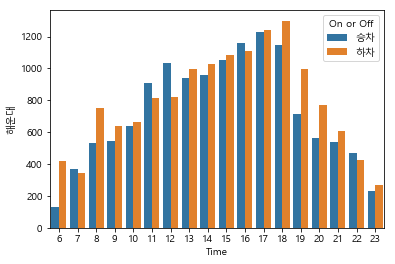

In [25]:
#ax.set_ylim(top=6000)
#ax.yaxis.label.set_visible(False)
#ax.set_title('1동래', fontdict={'fontsize':20})
bar = sns.barplot(data=group_bar, y='해운대', x='Time', hue="On or Off")

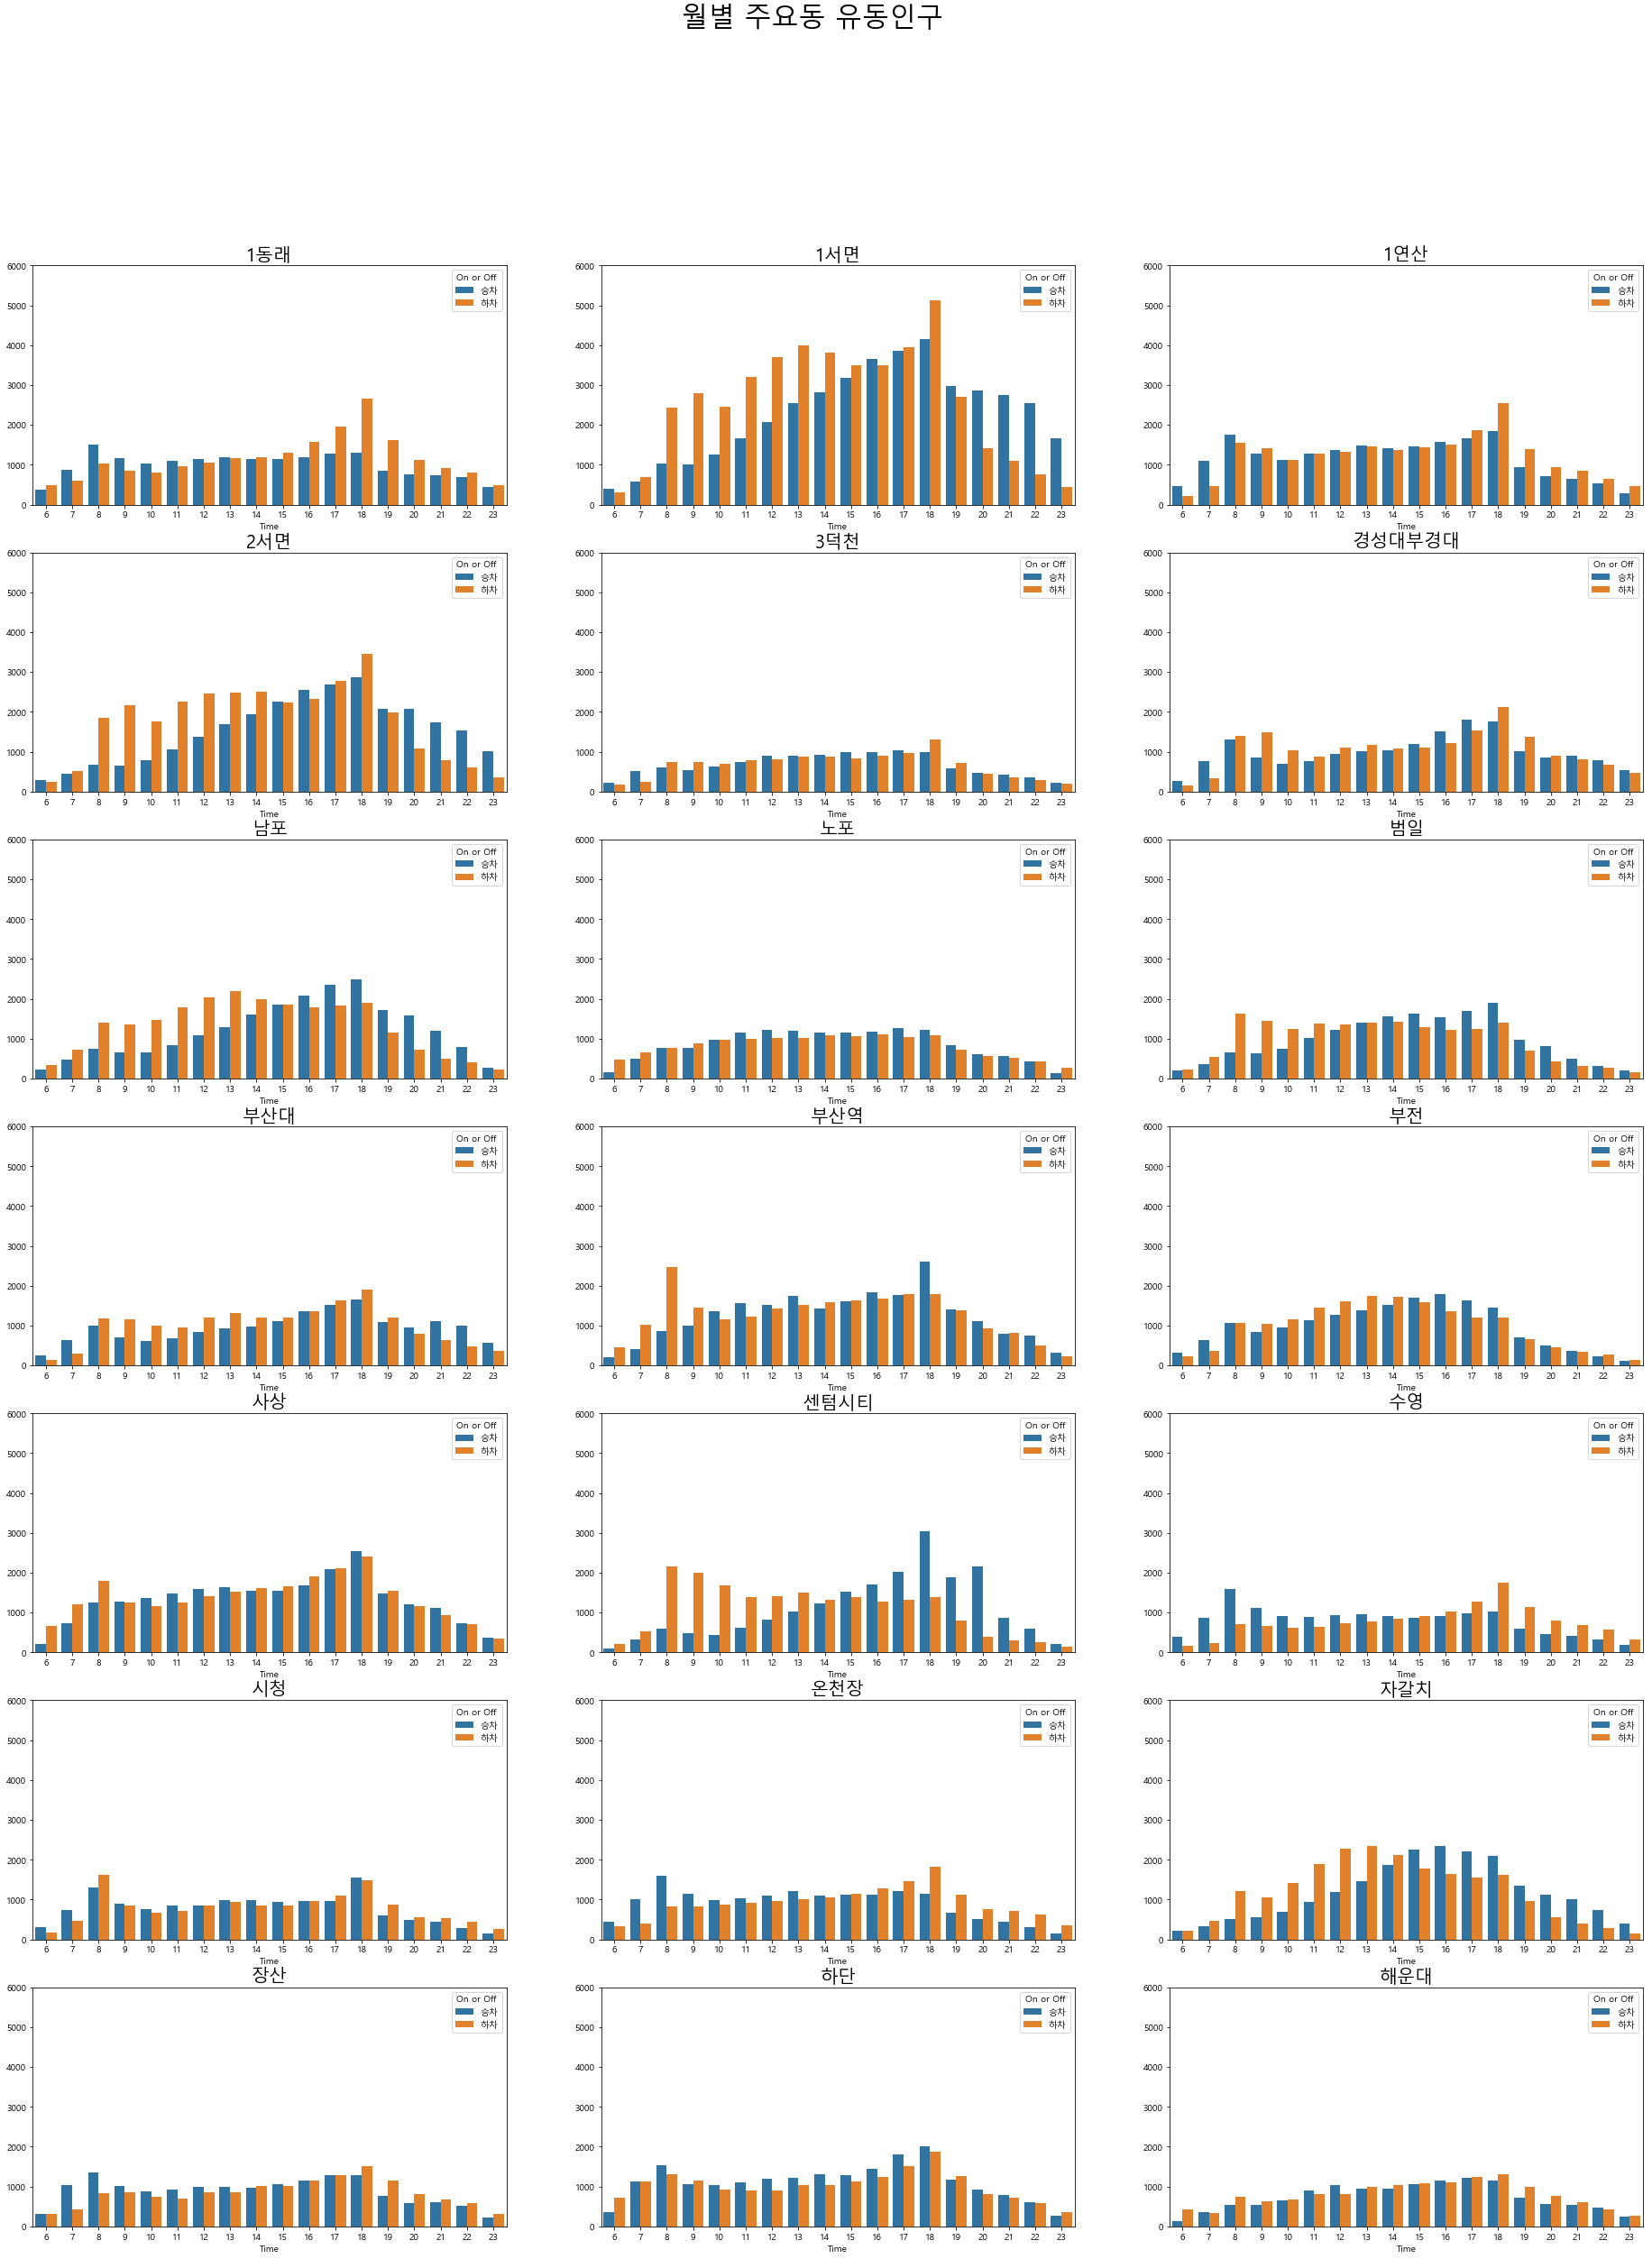

In [24]:
major_gu = ['1동래', '1서면', '1연산', '2서면', '3덕천', '경성대부경대', '남포', '노포', '범일', '부산대', '부산역', '부전', '사상', '센텀시티', '수영', '시청', '온천장', '자갈치', '장산', '하단', '해운대']

fig, ((ax1, ax2,ax3),(ax4,ax5,ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15),(ax16, ax17, ax18,), (ax19, ax20, ax21)) = plt.subplots(nrows=7, ncols=3)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20, ax21]
fig.set_size_inches(32,40)
fig.suptitle('월별 주요동 유동인구', fontsize=30)

for (gu, ax) in zip(major_gu, axes):
    ax.set_ylim(top=6000)
    ax.yaxis.label.set_visible(False)
    ax.set_title(gu, fontdict={'fontsize':20})
    sns.barplot(data=group_bar, y=gu, x='Time', hue='On or Off', ax= ax)